In [1]:
from igraph import *
import networkx as nx
import random
import louvain
import os,sys
import time
from tqdm import tqdm
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: This package has been superseded by the `leidenalg` package and will no longer be maintained. Please upgrade to the `leidenalg` package.
  after removing the cwd from sys.path.


In [2]:
def clique(g, size, idx, num_nodes):
  for i in range(idx,num_nodes-1):
    for j in range(idx - size,idx):
      g[i,j] = 0

In [3]:
def Print(g,num_nodes):
  G = nx.Graph()
  for i in range(num_nodes):
    G.add_node(i)
  for i in range(num_nodes):
    for j in range(i+1, num_nodes):
      if g[i,j] == 1:
        G.add_edge(i,j)
  nx.draw(G, with_labels=True)

## Infomap Hub-Node

In [4]:
def hub_node(clq1, clq2, alpha, beta):
    # 2 cliques connected by a hub node which is connected to all nodes of the graph
    num_nodes = 1 + clq1 + clq2
    g = Graph.Full(num_nodes)
    for i in range(1,clq1+1):
        for j in range(clq1+1, num_nodes):
            g[i,j] = 0
    for i in range(1, clq1-alpha+1):
        g[0,i] = 0
    for i in range(1, clq2-beta+1):
        g[0, clq1+i] = 0
#     Print(g, num_nodes)
    return g.community_infomap()
#     if(clq1 == 5 and clq2 == 6):

### Varying size of the left and right community

100%|██████████| 47/47 [01:47<00:00,  5.13s/it]


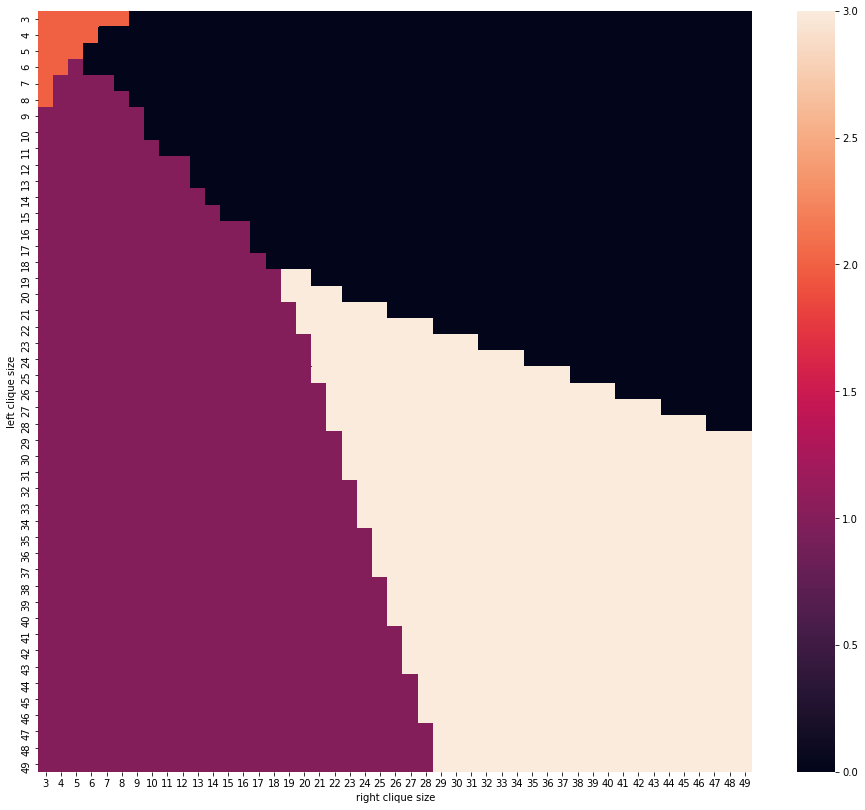

In [5]:
x_val = [i for i in range(3,50)]
y_val = [i for i in range(3,50)]
matrix_ans = []
for i in tqdm(x_val):
    temp = []
    for j in y_val:
        part = hub_node(i, j, i, j)
#         part = run_louvain(graph[0],graph[1])
#         print(i, part)
        if(len(part) == 1):
            temp.append(2)
        elif(len(part) == 3):
            temp.append(3)
        elif(0 in part[0] and 1 in part[0]):
            temp.append(1)
        elif(0  in part[1] and 1 in part[1]):
            temp.append(1)
        else:
            temp.append(0)
    matrix_ans.append(temp)
    
plt.figure(figsize = (16,14))
sns.heatmap(matrix_ans,xticklabels=y_val, yticklabels=x_val)
plt.xlabel("right clique size")
plt.ylabel("left clique size")
plt.show()

### Varing connectivity to left and right clique with size of clique set to 30

100%|██████████| 27/27 [00:38<00:00,  1.38s/it]


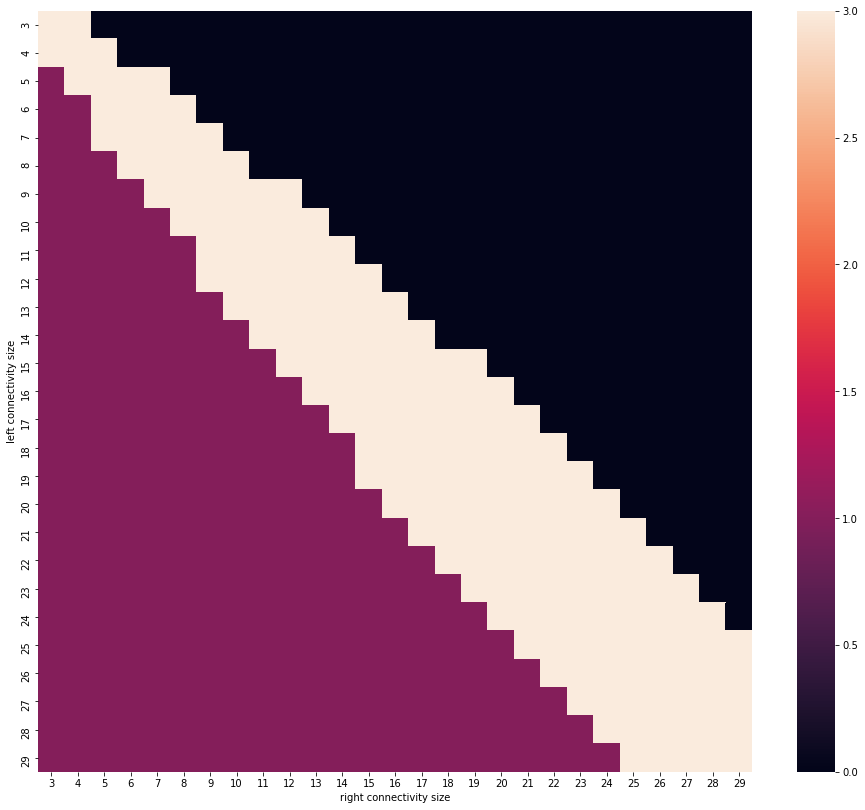

In [6]:
x_val = [i for i in range(3,30)]
y_val = [i for i in range(3,30)]
matrix_ans = []
for i in tqdm(x_val):
    temp = []
    for j in y_val:
        part = hub_node(30, 30, i, j)
        if(len(part) == 1):
            temp.append(2)
        elif(len(part) == 3):
            temp.append(3)
        elif(0 in part[0] and 1 in part[0]):
            temp.append(1)
        elif(0  in part[1] and 1 in part[1]):
            temp.append(1)
        else:
            temp.append(0)
    matrix_ans.append(temp)
    
plt.figure(figsize = (16,14))
sns.heatmap(matrix_ans,xticklabels=y_val, yticklabels=x_val)
plt.xlabel("right connectivity size")
plt.ylabel("left connectivity size")
plt.show()

### Varing connectivity to left and right clique with size of clique set to 50

100%|██████████| 47/47 [13:16<00:00, 16.77s/it]


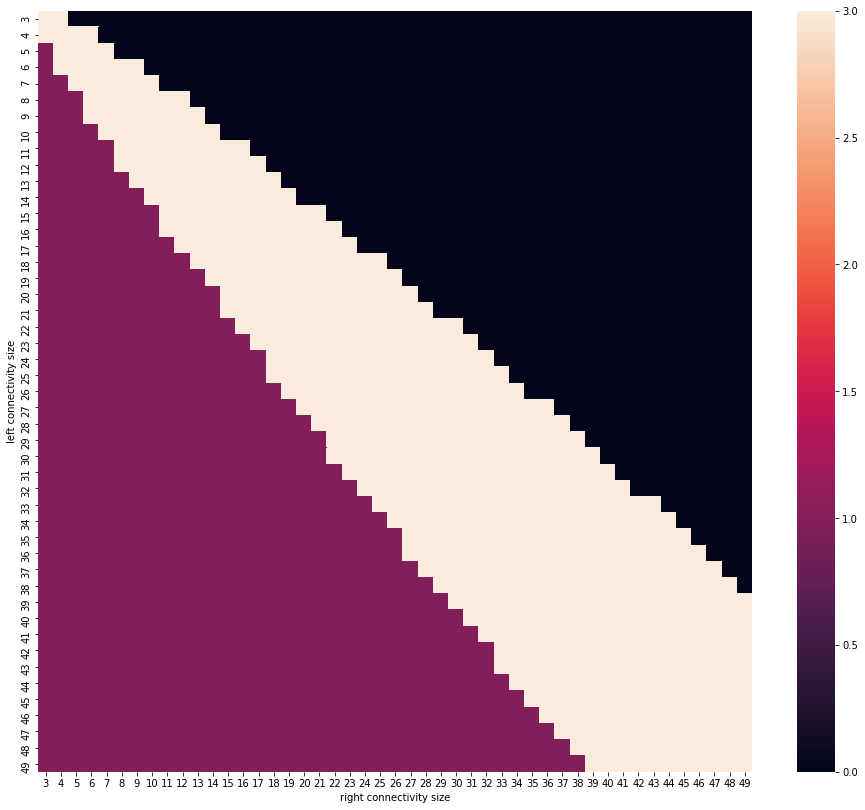

In [7]:
x_val = [i for i in range(3, 50)]
y_val = [i for i in range(3, 50)]
matrix_ans = []
for i in tqdm(x_val):
    temp = []
    for j in y_val:
        part = hub_node(50, 50, i, j)
        if(len(part) == 1):
            temp.append(2)
        elif(len(part) == 3):
            temp.append(3)
        elif(0 in part[0] and 1 in part[0]):
            temp.append(1)
        elif(0  in part[1] and 1 in part[1]):
            temp.append(1)
        else:
            temp.append(0)
    matrix_ans.append(temp)
    
plt.figure(figsize = (16,14))
sns.heatmap(matrix_ans,xticklabels=y_val, yticklabels=x_val)
plt.xlabel("right connectivity size")
plt.ylabel("left connectivity size")
plt.show()

100%|██████████| 12/12 [00:00<00:00, 14.97it/s]


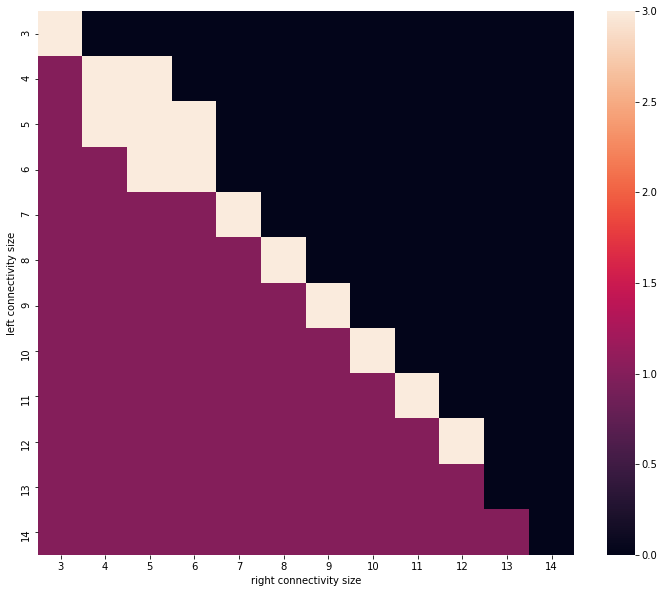

In [8]:
x_val = [i for i in range(3, 15)]
y_val = [i for i in range(3, 15)]
matrix_ans = []
for i in tqdm(x_val):
    temp = []
    for j in y_val:
        part = hub_node(15, 15, i, j)
        if(len(part) == 1):
            temp.append(2)
        elif(len(part) == 3):
            temp.append(3)
        elif(0 in part[0] and 1 in part[0]):
            temp.append(1)
        elif(0  in part[1] and 1 in part[1]):
            temp.append(1)
        else:
            temp.append(0)
    matrix_ans.append(temp)
    
plt.figure(figsize = (12,10))
sns.heatmap(matrix_ans,xticklabels=y_val, yticklabels=x_val)
plt.xlabel("right connectivity size")
plt.ylabel("left connectivity size")
plt.show()

### Ring of Cliques

In [9]:
def ring_cliques(x, y, check):
    num_nodes = x*y
    g = Graph(num_nodes)
    for i in range(x):
        for j in range(y-1):
            for k in range(j+1, y):
                g[y*i + j, y*i + k] = 1
        g[y*i, (y*(i+1))%num_nodes] = 1
    if(check):
        Print(g, num_nodes)
    return g.community_infomap()

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


Clustering with 50 elements and 10 clusters
[ 0] 0, 1, 2, 3, 4
[ 1] 5, 6, 7, 8, 9
[ 2] 10, 11, 12, 13, 14
[ 3] 15, 16, 17, 18, 19
[ 4] 20, 21, 22, 23, 24
[ 5] 25, 26, 27, 28, 29
[ 6] 30, 31, 32, 33, 34
[ 7] 35, 36, 37, 38, 39
[ 8] 40, 41, 42, 43, 44
[ 9] 45, 46, 47, 48, 49


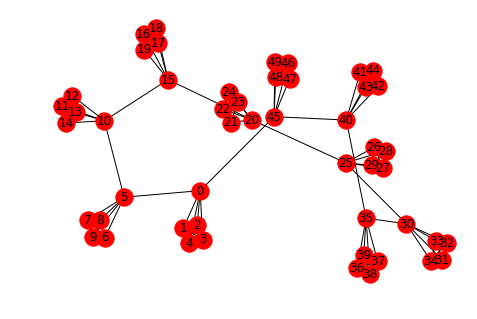

In [10]:
print(ring_cliques(10,5, True))

100%|██████████| 49/49 [2:33:55<00:00, 502.52s/it]


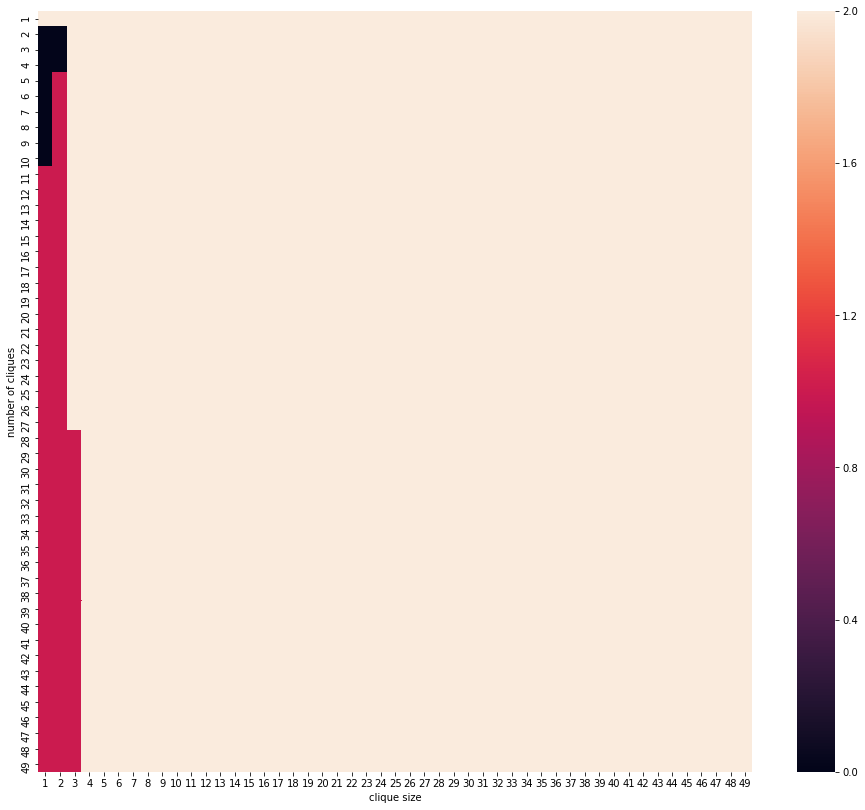

In [11]:
x_val = [i for i in range(1,50)]
y_val = [i for i in range(1,50)]
matrix_ans = []
for i in tqdm(x_val):
    temp = []
    for j in y_val:
        part = ring_cliques(i, j, False)
#         part = run_louvain(graph[0],graph[1])
#         print(i, part)
        if(len(part) == i):
            temp.append(2)
        elif(len(part) == 1):
            temp.append(0)
        else:
            temp.append(1)
    matrix_ans.append(temp)
    
plt.figure(figsize = (16,14))
sns.heatmap(matrix_ans,xticklabels=y_val, yticklabels=x_val)
plt.xlabel("clique size")
plt.ylabel("number of cliques")
plt.show()

### Big community surrounded small communities

In [12]:
def big_small(w, x, y, z, flag):
    num_nodes = w + x*y
    g = Graph(num_nodes)
    for i in range(w-1):
        for j in range(i+1, w):
            g[i,j] = 1
    for i in range(y): # 0 1 2
        for j in range(x-1): # 0
            for k in range(j+1, x): # 1 
                g[w + i*x + j, w + i*x + k] = 1
        for j in range(z):
            g[i, w + i*x + j] = 1
    if(flag):
        Print(g, num_nodes)
    return g.community_infomap()

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


Clustering with 85 elements and 11 clusters
[ 0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14
[ 1] 15, 16, 17, 18, 19, 20, 21
[ 2] 22, 23, 24, 25, 26, 27, 28
[ 3] 29, 30, 31, 32, 33, 34, 35
[ 4] 36, 37, 38, 39, 40, 41, 42
[ 5] 43, 44, 45, 46, 47, 48, 49
[ 6] 50, 51, 52, 53, 54, 55, 56
[ 7] 57, 58, 59, 60, 61, 62, 63
[ 8] 64, 65, 66, 67, 68, 69, 70
[ 9] 71, 72, 73, 74, 75, 76, 77
[10] 78, 79, 80, 81, 82, 83, 84


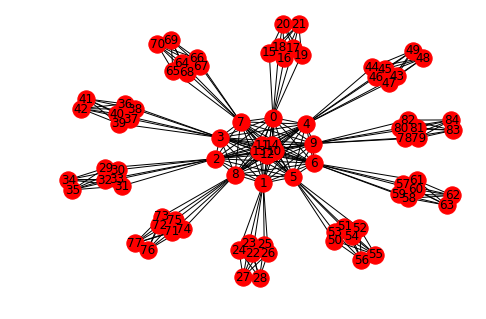

In [13]:
print(big_small(15, 7, 10, 5, True))

100%|██████████| 40/40 [14:53<00:00, 48.62s/it]


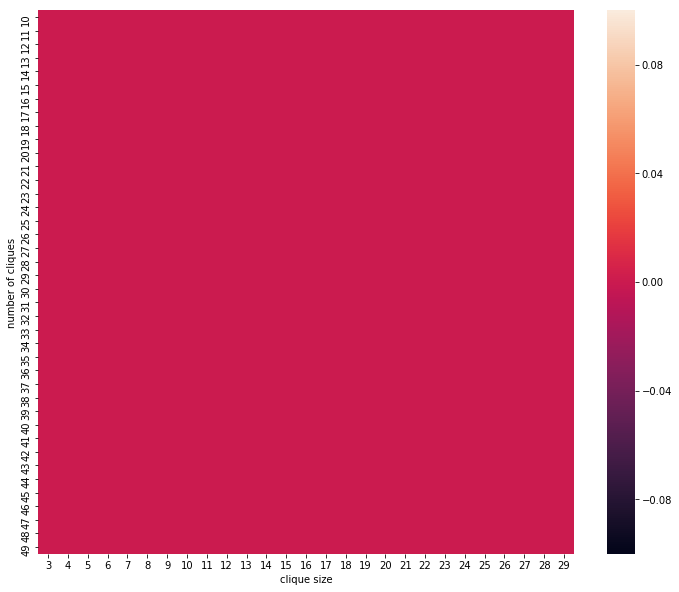

In [14]:
x_val = [i for i in range(10,50)]
y_val = [i for i in range(3, 30)]
matrix_ans = []
for i in tqdm(x_val):
    temp = []
    for j in y_val:
        part = big_small(i, j, i, j, False)
        if(len(part) == 1 + i):
            temp.append(1)
        else:
            temp.append(0)
    matrix_ans.append(temp)
    
plt.figure(figsize = (12,10))
sns.heatmap(matrix_ans,xticklabels=y_val, yticklabels=x_val)
plt.xlabel("clique size")
plt.ylabel("number of cliques")
plt.show()

## We don't even merge when the outter community is bigger than the central community!